# **Generating Emojis - DCGAN**

In [ ]:
import torch
from torch import FloatTensor, LongTensor
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder

In [52]:
# kaggle dataset -> subinium/emojiimage-dataset

In [ ]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Resize((72, 72)),
        transforms.Normalize(mean = (0.5), std = (0.5))
    ]
)

In [ ]:
data = ImageFolder("/content/image", transform = transform)

In [ ]:
data_loader = DataLoader(data, batch_size = 100, shuffle = True)
data_loader.dataset

Dataset ImageFolder
    Number of datapoints: 14253
    Root location: /content/image
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=(72, 72), interpolation=bilinear, max_size=None, antialias=warn)
               Normalize(mean=0.5, std=0.5)
           )

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

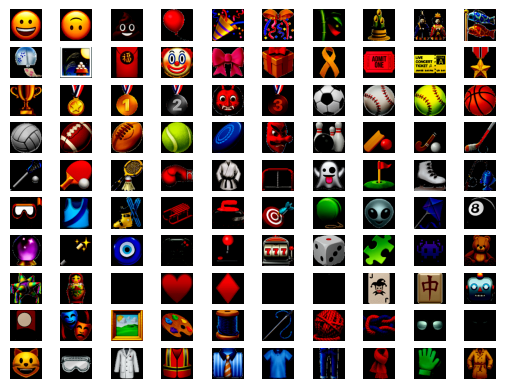

In [ ]:
fig = plt.figure()

for i in range(100):
  fig.add_subplot(10, 10, i + 1)
  plt.imshow(data[i][0].detach().numpy().transpose((1, 2, 0)))
  plt.axis("off")

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
import torch.nn as nn

In [ ]:
class Discriminator(nn.Module):

  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        # in: 3 x 72 x 72

        nn.Conv2d(3, 16, kernel_size = 4, padding = 1, stride = 2, bias = False),
        nn.BatchNorm2d(16),
        nn.LeakyReLU(0.2, inplace = True),
        # out: 16 x 36 x 36

        nn.Conv2d(16, 64, kernel_size = 4, padding = 1, stride = 2, bias = False),
        nn.BatchNorm2d(64),
        nn.LeakyReLU(0.2, inplace = True),
        # out: 64 x 18 x 18

        nn.Conv2d(64, 256, kernel_size = 4, padding = 1, stride = 2, bias = False),
        nn.BatchNorm2d(256),
        nn.LeakyReLU(0.2, inplace = True),
        # out: 256 x 9 x 9

        nn.Conv2d(256, 512, kernel_size = 3, padding = 0, stride = 3, bias = False),
        nn.BatchNorm2d(512),
        nn.LeakyReLU(0.2, inplace = True),
        # out: 512 x 3 x 3

        nn.Conv2d(512, 1, kernel_size = 3, padding = 0, stride = 3, bias = False),
        # out: 1 x 1 x 1

        nn.Flatten(),
        # out: 1

        nn.Sigmoid()
    )

  def forward(self, x):
    return self.model(x)

In [ ]:
latent_dim = 256

class Generator(nn.Module):

  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        # in: 256 x 1 x 1

        nn.ConvTranspose2d(latent_dim, 512, kernel_size = 3, padding = 0, stride = 3, bias = False),
        nn.BatchNorm2d(512),
        nn.ReLU(inplace = True),
        # out: 512 x 3 x 3

        nn.ConvTranspose2d(512, 128, kernel_size = 3, padding = 0, stride = 3, bias = False),
        nn.BatchNorm2d(128),
        nn.ReLU(inplace = True),
        # out: 128 x 9 x 9

        nn.ConvTranspose2d(128, 84, kernel_size = 4, padding = 1, stride = 2, bias = False),
        nn.BatchNorm2d(84),
        nn.ReLU(inplace = True),
        # out: 84 x 18 x 18

        nn.ConvTranspose2d(84, 64, kernel_size = 4, padding = 1, stride = 2, bias = False),
        nn.BatchNorm2d(64),
        nn.ReLU(inplace = True),
        # out: 64 x 36 x 36

        nn.ConvTranspose2d(64, 3, kernel_size = 4, padding = 1, stride = 2, bias = False),
        # out: 3 x 72 x 72

        nn.Tanh()
    )

  def forward(self, x):
    return self.model(x)

In [ ]:
discriminator = Discriminator().to(device)
generator = Generator().to(device)

In [ ]:
discriminator

Discriminator(
  (model): Sequential(
    (0): Conv2d(3, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
    (3): Conv2d(16, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.2, inplace=True)
    (6): Conv2d(64, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): LeakyReLU(negative_slope=0.2, inplace=True)
    (9): Conv2d(256, 512, kernel_size=(3, 3), stride=(3, 3), bias=False)
    (10): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): LeakyReLU(negative_slope=0.2, inplace=True)
    (12): Conv2d(512, 1, kernel_size=(3, 3), stride=(3, 

In [ ]:
generator

Generator(
  (model): Sequential(
    (0): ConvTranspose2d(256, 512, kernel_size=(3, 3), stride=(3, 3), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 128, kernel_size=(3, 3), stride=(3, 3), bias=False)
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(128, 84, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(84, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(84, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)

In [ ]:
loss_fn = nn.BCELoss()

optim_d = torch.optim.Adam(discriminator.parameters(), lr = 0.0002)
optim_g = torch.optim.Adam(generator.parameters(), lr = 0.0002)

In [ ]:
import os
from torchvision.utils import save_image

In [ ]:
epochs = 100

for epoch in range(epochs):
  for b, (real_imgs, _) in enumerate(data_loader):
    batch_size = real_imgs.shape[0]
    real_imgs = real_imgs.to(device)

    real_labels = torch.ones(batch_size, 1).to(device)
    fake_labels = torch.zeros(batch_size, 1).to(device)

    # Training -> Generator
    x = torch.randn(batch_size, latent_dim, 1, 1).to(device)
    fake_imgs = generator(x)
    g_loss = loss_fn(discriminator(fake_imgs), real_labels)

    optim_g.zero_grad()
    g_loss.backward()
    optim_g.step()

    # Training -> Discriminator
    d_loss_real = loss_fn(discriminator(real_imgs), real_labels)
    d_loss_fake = loss_fn(discriminator(fake_imgs.detach()), fake_labels)
    d_loss = (d_loss_real + d_loss_fake) / 2

    optim_d.zero_grad()
    d_loss.backward()
    optim_d.step()

    if (b + 1) % 25 == 0:
            print(f"[Epoch {epoch + 1}] [Batch {b + 1}] [D loss: {d_loss.item()}] [G loss: {g_loss.item()}]")

  # Save generated images
  os.makedirs("images", exist_ok = True)
  save_image(fake_imgs.view(fake_imgs.size(0), 3, 72, 72), f"images/{epoch + 1}.png", normalize = True)

[Epoch 1] [Batch 25] [D loss: 0.012225523591041565] [G loss: 4.492288112640381]
[Epoch 1] [Batch 50] [D loss: 0.012314227409660816] [G loss: 4.627021789550781]
[Epoch 1] [Batch 75] [D loss: 0.011399772949516773] [G loss: 5.355536937713623]
[Epoch 1] [Batch 100] [D loss: 0.008025025017559528] [G loss: 5.0899505615234375]
[Epoch 1] [Batch 125] [D loss: 0.005442347377538681] [G loss: 5.516767501831055]
[Epoch 2] [Batch 25] [D loss: 0.005424635484814644] [G loss: 5.337800025939941]
[Epoch 2] [Batch 50] [D loss: 0.0061258589848876] [G loss: 6.163286209106445]
[Epoch 2] [Batch 75] [D loss: 0.008310438133776188] [G loss: 5.682345867156982]
[Epoch 2] [Batch 100] [D loss: 0.008058866485953331] [G loss: 5.591994285583496]
[Epoch 2] [Batch 125] [D loss: 0.004318569786846638] [G loss: 5.502299785614014]
[Epoch 3] [Batch 25] [D loss: 0.00798480212688446] [G loss: 5.320323944091797]
[Epoch 3] [Batch 50] [D loss: 0.017871815711259842] [G loss: 7.108879089355469]
[Epoch 3] [Batch 75] [D loss: 0.004748

In [ ]:
epochs = 100

for epoch in range(epochs, epochs * 2):
  for b, (real_imgs, _) in enumerate(data_loader):
    batch_size = real_imgs.shape[0]
    real_imgs = real_imgs.to(device)

    real_labels = torch.ones(batch_size, 1).to(device)
    fake_labels = torch.zeros(batch_size, 1).to(device)

    # Training -> Generator
    x = torch.randn(batch_size, latent_dim, 1, 1).to(device)
    fake_imgs = generator(x)
    g_loss = loss_fn(discriminator(fake_imgs), real_labels)

    optim_g.zero_grad()
    g_loss.backward()
    optim_g.step()

    # Training -> Discriminator
    d_loss_real = loss_fn(discriminator(real_imgs), real_labels)
    d_loss_fake = loss_fn(discriminator(fake_imgs.detach()), fake_labels)
    d_loss = (d_loss_real + d_loss_fake) / 2

    optim_d.zero_grad()
    d_loss.backward()
    optim_d.step()

    if (b + 1) % 25 == 0:
            print(f"[Epoch {epoch + 1}] [Batch {b + 1}] [D loss: {d_loss.item()}] [G loss: {g_loss.item()}]")

  # Save generated images
  os.makedirs("images", exist_ok = True)
  save_image(fake_imgs.view(fake_imgs.size(0), 3, 72, 72), f"images/{epoch + 1}.png", normalize = True)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


[Epoch 101] [Batch 25] [D loss: 0.017404183745384216] [G loss: 10.87453556060791]
[Epoch 101] [Batch 50] [D loss: 0.0029585363809019327] [G loss: 11.094823837280273]
[Epoch 101] [Batch 75] [D loss: 0.0015650783898308873] [G loss: 10.265742301940918]
[Epoch 101] [Batch 100] [D loss: 0.004883401095867157] [G loss: 9.374561309814453]
[Epoch 101] [Batch 125] [D loss: 0.010233784094452858] [G loss: 8.648119926452637]
[Epoch 102] [Batch 25] [D loss: 0.003323140786960721] [G loss: 7.576607704162598]
[Epoch 102] [Batch 50] [D loss: 0.006878233514726162] [G loss: 6.223221302032471]
[Epoch 102] [Batch 75] [D loss: 0.003865557024255395] [G loss: 7.201407432556152]
[Epoch 102] [Batch 100] [D loss: 0.0036084793973714113] [G loss: 6.88219690322876]
[Epoch 102] [Batch 125] [D loss: 0.0027876102831214666] [G loss: 8.466135025024414]
[Epoch 103] [Batch 25] [D loss: 0.0026027034036815166] [G loss: 9.14528751373291]
[Epoch 103] [Batch 50] [D loss: 0.07026144862174988] [G loss: 6.1198272705078125]
[Epoch 

## **Generated Images**

In [ ]:
from PIL import Image

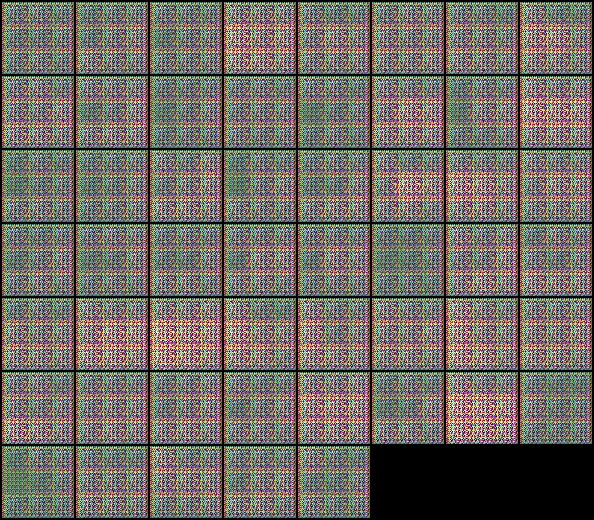

In [39]:
# Generated Images - Epoch 1
Image.open("images/1.png")

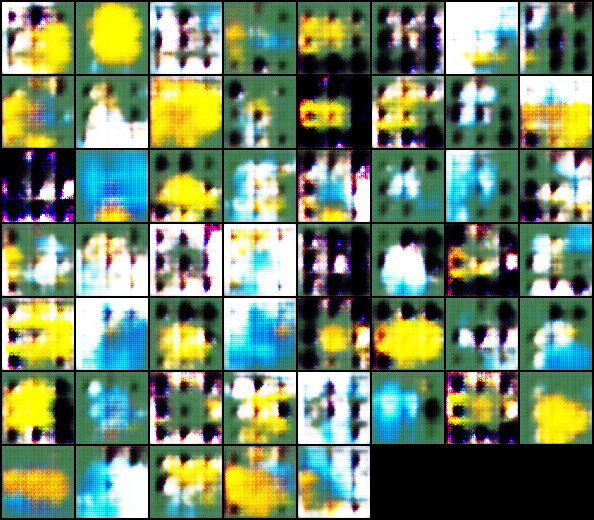

In [40]:
# Generated Images - Epoch 20
Image.open("images/20.png")

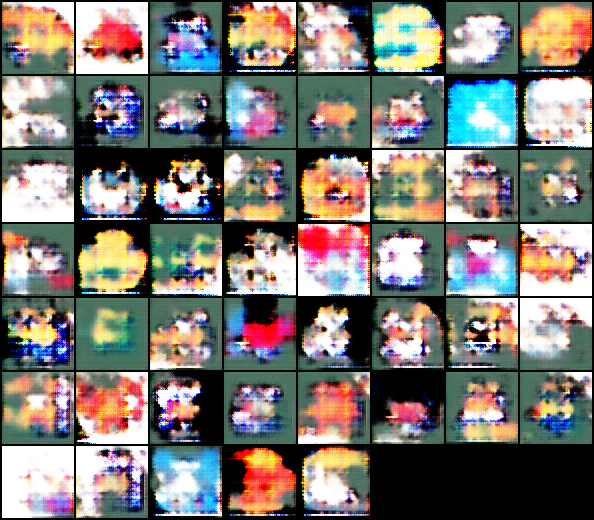

In [41]:
# Generated Images - Epoch 40
Image.open("images/40.png")

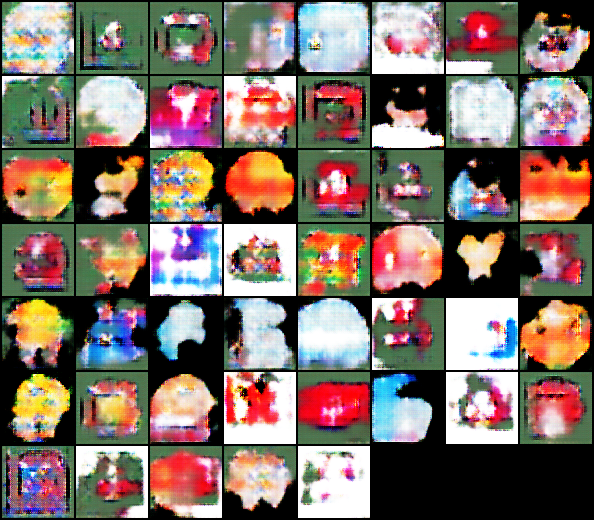

In [42]:
# Generated Images - Epoch 60
Image.open("images/60.png")

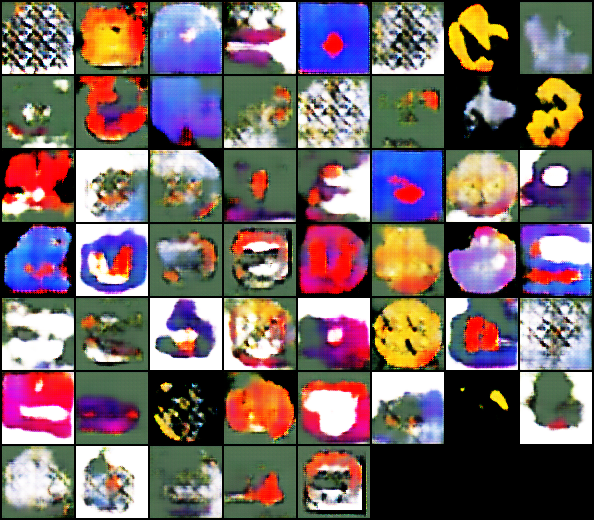

In [43]:
# Generated Images - Epoch 80
Image.open("images/80.png")

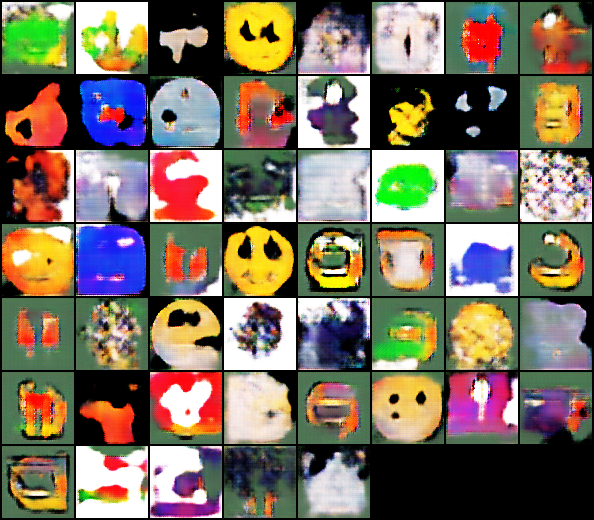

In [44]:
# Generated Images - Epoch 100
Image.open("images/100.png")

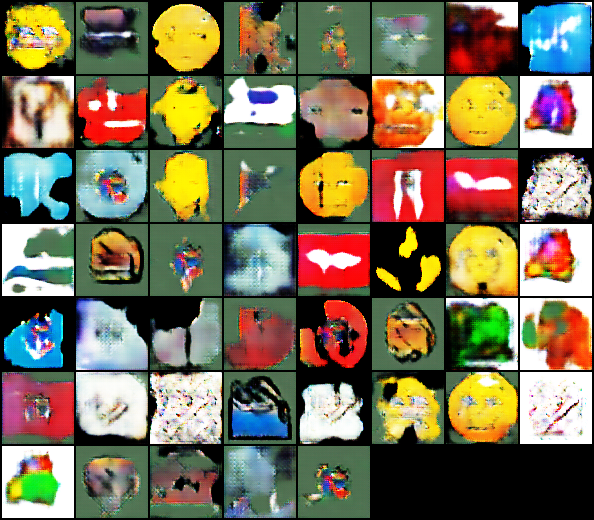

In [45]:
# Generated Images - Epoch 150
Image.open("images/150.png")

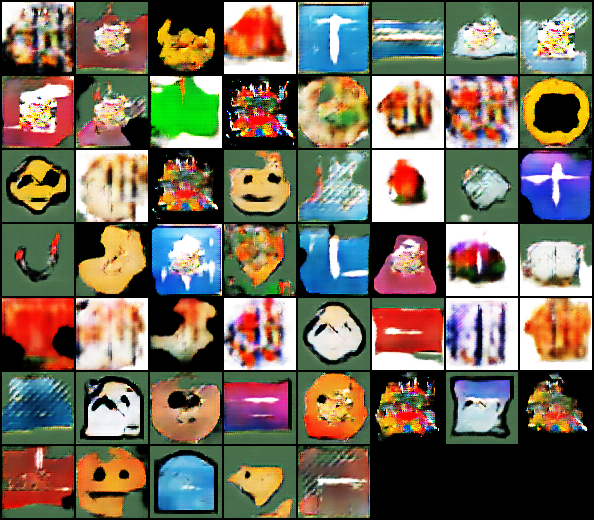

In [46]:
# Generated Images - Epoch 200
Image.open("images/200.png")